<a href="https://colab.research.google.com/github/PINKIREKHA/aerofit_study/blob/main/AEROFIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [3]:
import pandas as pd
df = pd.read_csv("aerofit.txt")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape     #this shows the shape of data frame with number of rows and columns

(180, 9)

In [ ]:
df.info()   # this gives column details ... here its clear that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().any()     #to check if there are any null values

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

In [ ]:
df1 = df.describe(include = "all")
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


<Axes: ylabel='Miles'>

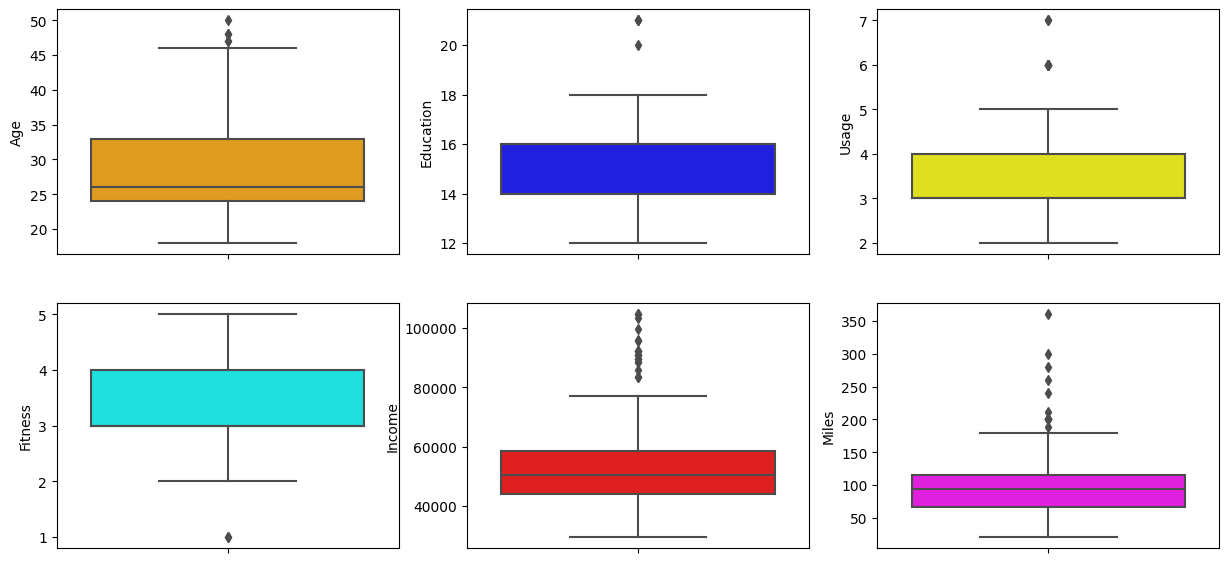

In [4]:
# checking outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(nrows = 2, ncols = 3 , figsize=(15,7))
sns.boxplot(data = df , y ="Age" , ax =axis[0,0], color = "orange")
sns.boxplot(data = df , y ="Education" , ax =axis[0,1], color = "blue")
sns.boxplot(data = df , y ="Usage" , ax =axis[0,2], color = "yellow")
sns.boxplot(data = df , y ="Fitness" , ax =axis[1,0], color = "aqua")
sns.boxplot(data = df , y ="Income" , ax =axis[1,1], color = "red")
sns.boxplot(data = df , y ="Miles" , ax =axis[1,2], color = "magenta")


In [6]:
df["Gender"].value_counts(normalize = True)*100   #to check percentage of both genders

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

In [7]:
df["Product"].value_counts(normalize = True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [8]:
df["Usage"].value_counts(normalize = True)*100

3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

Text(0.5, 1.0, 'Product count based on marital status')

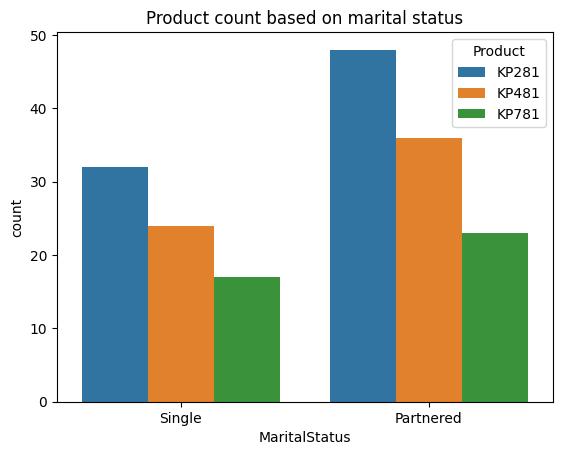

In [ ]:
sns.countplot(x = "MaritalStatus", data = df , hue = "Product")
plt.title("Product count based on marital status")  #EFFECT OF MARITAL STATUS ON PRODUCT PURCHASED

<Axes: xlabel='MaritalStatus', ylabel='Income'>

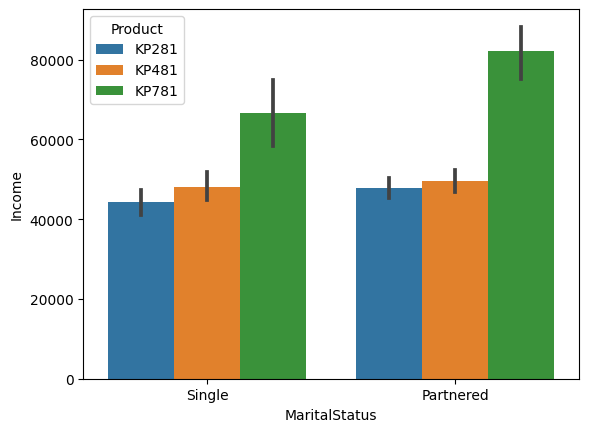

In [ ]:
sns.barplot(x = "MaritalStatus", y = "Income",  data = df , hue = "Product")

<Axes: xlabel='Product', ylabel='Age'>

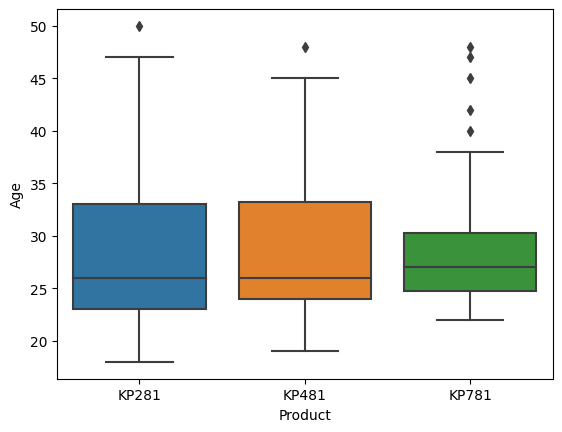

In [ ]:
import seaborn as sns
sns.boxplot( x = "Product",  y = "Age",  data = df)     #EFFECT OF AGE ON PRODUCT PURCHASED

<Axes: xlabel='Product', ylabel='count'>

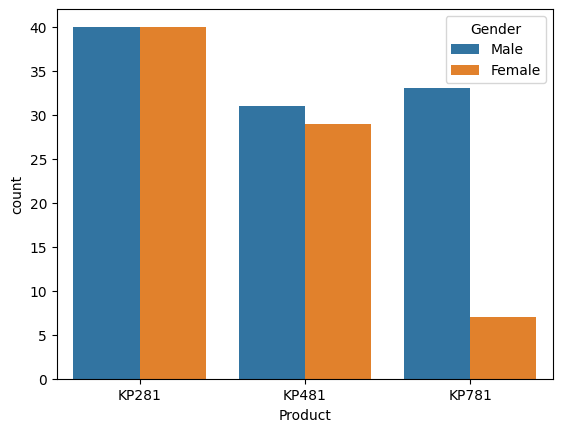

In [ ]:
sns.countplot(x= "Product" , data = df, hue = "Gender")

In [ ]:
# Representing the marginal probability like - what percent of customers have purchased KP281,
#  KP481, or KP781 in a table (can use pandas.crosstab here)

In [ ]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins = "True")


Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [9]:
pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True, normalize =True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df['Product'], columns=df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [ ]:
# Check correlation among different factors using heat maps or pair plots.

<ipython-input-48-6a09541e6a1a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);


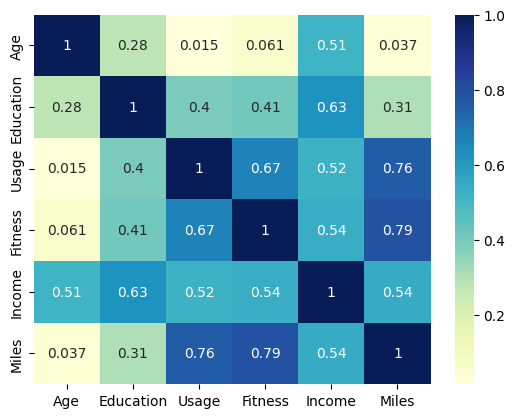

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

Customer Profiling - Categorization of users.

Customer Segmentation Analysis

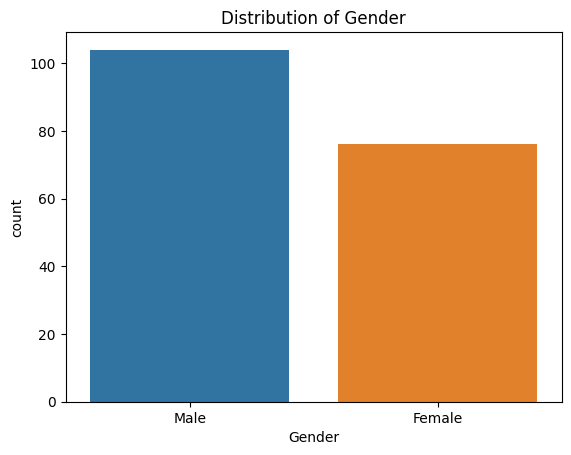

In [ ]:

# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender');

There are slightly more male users than females

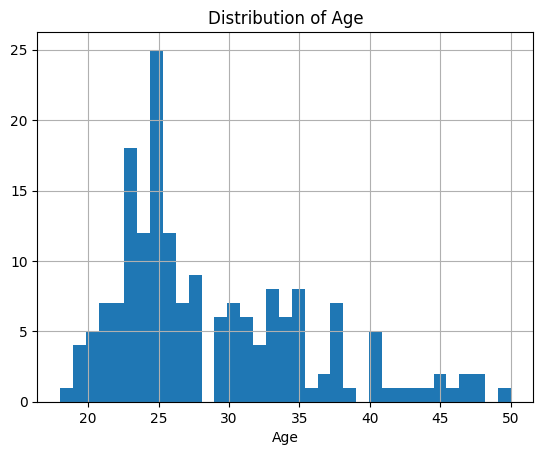

In [ ]:
# Create a histogram of ages
import matplotlib.pyplot as plt

df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

The ages are mostly between 23 and 35. Recalling the describe() call results this makes sense. The average age was 28.8. There are less older customers, so this distribution is right-skewed because of its longer right tail. This could be because of more aged customers are not comfortable on treadmill  as the younger customers.

we can add detail to this by overlaying two histograms, creating one age histogram for each gender.

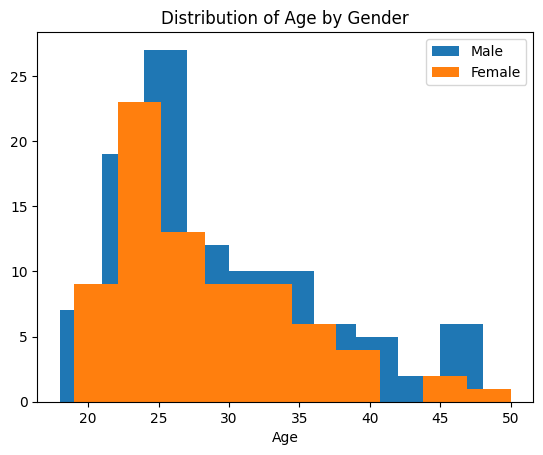

In [ ]:
plt.hist('Age', data=df[df['Gender'] == 'Male'],  label='Male');
plt.hist('Age', data=df[df['Gender'] == 'Female'],  label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

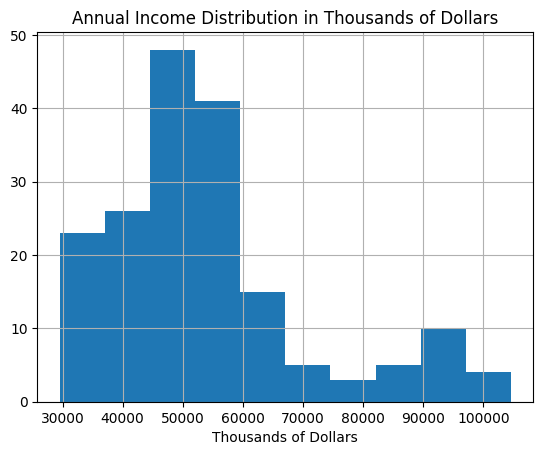

In [ ]:
# Distribution of Annual Income
df.hist('Income');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

In [ ]:
from scipy.stats import norm
df["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
new = norm( 29,7)

In [ ]:
new.cdf(40)

0.9419584331306725

In [ ]:
new.cdf(18)

0.05804156686932752

In [ ]:
new.cdf(40)-new.cdf(18)

0.883916866261345

<Axes: xlabel='Age', ylabel='Density'>

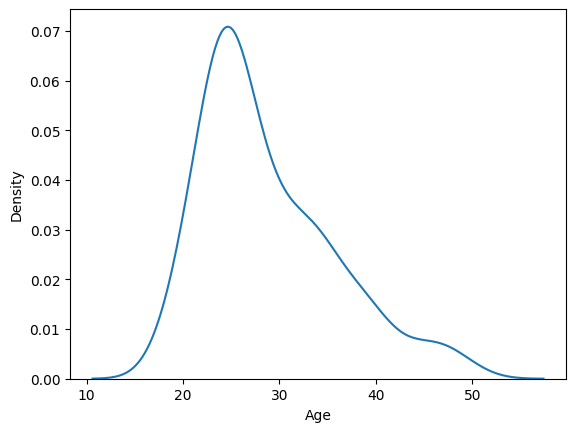

In [ ]:
sns.kdeplot(df["Age"])

<Axes: xlabel='Income', ylabel='Density'>

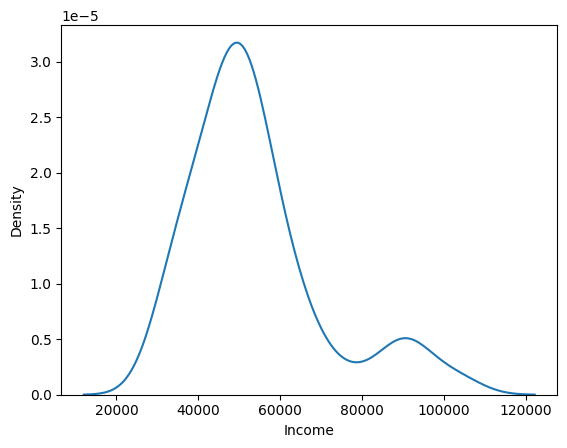

In [ ]:
sns.kdeplot(df["Income"])

In [ ]:
from scipy.stats import norm
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [ ]:
new = norm(53719,16506.6)

In [ ]:
new.cdf(20000)

0.020538167665540005

In [ ]:
new.cdf(80000)

0.9443246120184545

In [ ]:
new.cdf(80000)-new.cdf(20000)

0.9237864443529146

In [ ]:
from scipy.stats import norm
df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

<Axes: xlabel='Miles', ylabel='Density'>

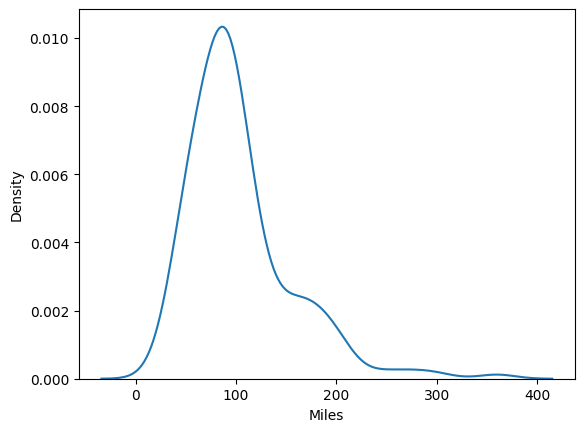

In [ ]:
sns.kdeplot(df["Miles"])

In [ ]:
new = norm(103,51.8)

In [ ]:
new.cdf(0)

0.023382795731984762

In [ ]:
new.cdf(200)

0.9694372722610985

In [ ]:
new.cdf(200)-new.cdf(0)

0.9460544765291138

Text(0.5, 1.0, 'usage per week')

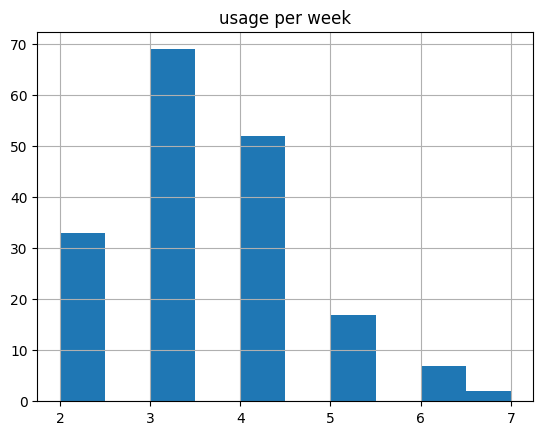

In [ ]:
df.hist('Usage')
plt.title("usage per week")


Text(0.5, 1.0, 'Fitness level')

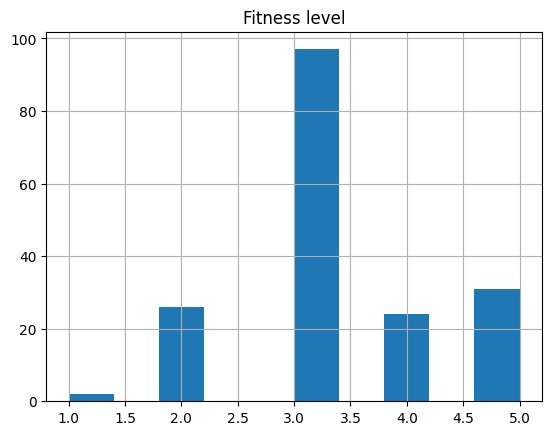

In [ ]:
df.hist('Fitness')
plt.title("Fitness level")


Text(0.5, 1.0, 'Education in years ')

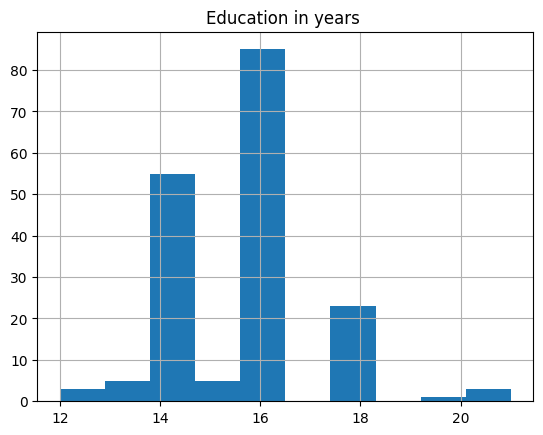

In [ ]:
df.hist('Education')
plt.title("Education in years ")


<Axes: xlabel='Education', ylabel='Density'>

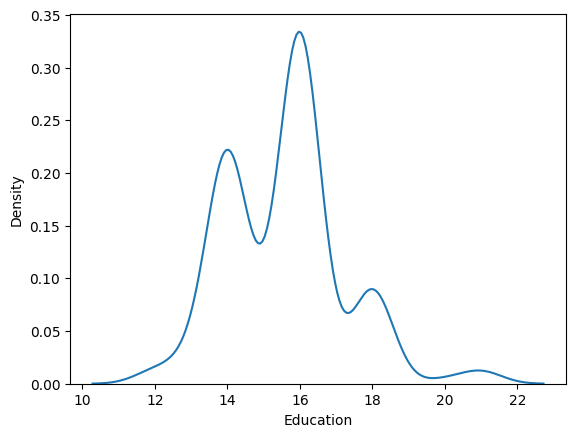

In [ ]:
sns.kdeplot(df["Education"])